In [61]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator, QasmSimulator
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit_aer.noise import depolarizing_error, coherent_unitary_error, NoiseModel
from qiskit.quantum_info import SparsePauliOp, Operator
from qiskit.circuit.library import CXGate, RXGate, IGate, ZGate

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def coherent_noise_backend(
        theta: float = 0,
        Simulator = QasmSimulator
):
    """
    Add a noise channel with over-rotation on the CNOT gate on the target by theta to the backend
    """

    cnot = Operator(CXGate())
    up_state = 0.5 * (Operator(IGate()) + Operator(ZGate()))
    down_state = 0.5 * (Operator(IGate()) - Operator(ZGate()))
    over_rotated_cnot = Operator(IGate()).tensor(up_state) + 1.0j * Operator(RXGate(np.pi + theta)).tensor(down_state)
    err_unitary = over_rotated_cnot @ cnot
    err_coherent = coherent_unitary_error(err_unitary)

    # Create a noise model from the error channels
    noisemodel = NoiseModel()
    noisemodel.add_all_qubit_quantum_error(err_coherent, ['cx'])
    backend = Simulator(noise_model=noisemodel)

    return backend

In [62]:
out_00 = []
out_01 = []
out_10 = []
out_11 = []

n = 500
shots = 2500
thetas = [4 * np.pi / n * i for i in range(n)]
for theta in thetas:
    backend = coherent_noise_backend(theta=theta)

    qc = QuantumCircuit(2)
    # qc.x(0)
    # qc.x(1)
    qc.cnot(0, 1)
    # qc.append(CXGate(), [0, 1])
    qc.measure_all()

    qc_trans = transpile(qc, backend=backend, optimization_level=3)
    counts = backend.run(qc_trans, shots=shots).result().get_counts()
    out_00.append(counts.get('00', 0) / shots)
    out_01.append(counts.get('01', 0) / shots)
    out_10.append(counts.get('10', 0) / shots)
    out_11.append(counts.get('11', 0) / shots)

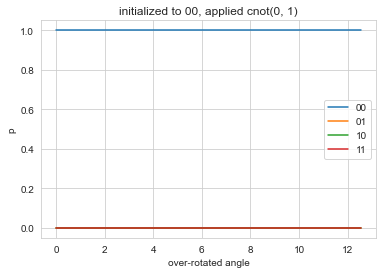

In [63]:
plt.style.use({'figure.facecolor':'white'})
plt.plot(thetas, out_00, label='00')
plt.plot(thetas, out_01, label='01')
plt.plot(thetas, out_10, label='10')
plt.plot(thetas, out_11, label='11')
plt.title('initialized to 00, applied cnot(0, 1)')
plt.ylabel('p')
plt.xlabel('over-rotated angle')
plt.legend()
plt.show()

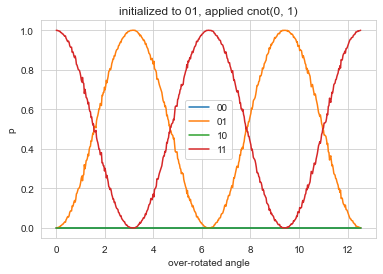

In [58]:
plt.style.use({'figure.facecolor':'white'})
plt.plot(thetas, out_00, label='00')
plt.plot(thetas, out_01, label='01')
plt.plot(thetas, out_10, label='10')
plt.plot(thetas, out_11, label='11')
plt.title('initialized to 01, applied cnot(0, 1)')
plt.ylabel('p')
plt.xlabel('over-rotated angle')
plt.legend()
plt.show()

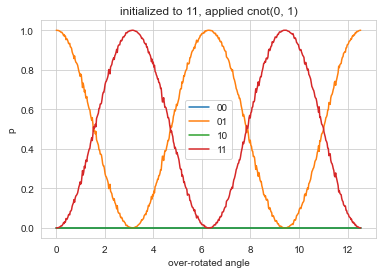

In [56]:
plt.style.use({'figure.facecolor': 'white'})
plt.plot(thetas, out_00, label='00')
plt.plot(thetas, out_01, label='01')
plt.plot(thetas, out_10, label='10')
plt.plot(thetas, out_11, label='11')
plt.title('initialized to 11, applied cnot(0, 1)')
plt.ylabel('p')
plt.xlabel('over-rotated angle')
plt.legend()
plt.show()